In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

df_raw = pd.read_csv('data.csv')

In [2]:
df = df_raw.copy(deep=True)

## Create dictionary of values for each of the disability categories by location

In [3]:
disability_dict = {}
for year in list(df['Year'].unique()):
    disability_dict[year] = {}
    for location in list(df['LocationAbbr'].unique()):
        disability_dict[year][location] = {}
        for disability in list(df[df['Response'].str.contains('Disability')]['Response'].unique()):
            if (tmp := df[(df['Year'] == year) & (df['LocationAbbr'] == location) & (df['Response'] == disability)]['Number'].values).size > 0:
                disability_dict[year][location][disability.split(' ')[0]] = int(tmp.item())
            else:
                disability_dict[year][location][disability.split(' ')[0]] = 'NA'

In [4]:
for k1, v1 in disability_dict.items():
    for k2, v2 in v1.items():
        for k3, v3 in v2.items():
            if v3 == 'NA':
                print(k1, k2, k3, v3)

2017 VI Any NA
2017 VI Mobility NA
2017 VI No NA
2017 VI Vision NA
2017 VI Hearing NA
2017 VI Independent NA
2017 VI Cognitive NA
2017 VI Self-care NA
2018 VI Any NA
2018 VI Mobility NA
2018 VI No NA
2018 VI Vision NA
2018 VI Hearing NA
2018 VI Independent NA
2018 VI Cognitive NA
2018 VI Self-care NA
2019 NJ Any NA
2019 NJ Mobility NA
2019 NJ No NA
2019 NJ Vision NA
2019 NJ Hearing NA
2019 NJ Independent NA
2019 NJ Cognitive NA
2019 NJ Self-care NA
2019 VI Any NA
2019 VI Mobility NA
2019 VI No NA
2019 VI Vision NA
2019 VI Hearing NA
2019 VI Independent NA
2019 VI Cognitive NA
2019 VI Self-care NA


## Visualize Disability breakdown by Location

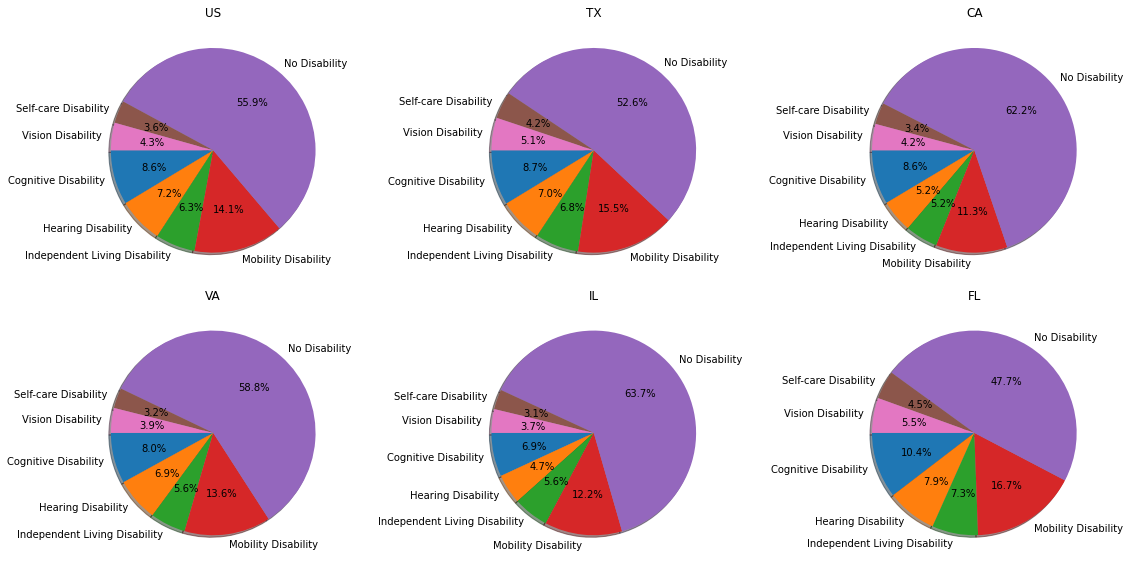

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
matplotlib.rcParams['font.size'] = 10

axes[0][0].set_title('US')
axes[0][0].pie(
    (tmp := df[
        (df['LocationAbbr'] == 'US') &
        (df['Response'].str.contains('Disability')) &
        ~((df['Response'].str.contains('Any')))
    ]).sort_values('Response').groupby('Response')['Number'].sum(),
    labels=tmp['Response'].sort_values().unique(),
    autopct='%1.1f%%',
    startangle=180,
    shadow=True);

axes[0][1].set_title('TX')
axes[0][1].pie(
    (tmp := df[
        (df['LocationAbbr'] == 'TX') &
        (df['Response'].str.contains('Disability')) &
        ~((df['Response'].str.contains('Any')))
    ]).sort_values('Response').groupby('Response')['Number'].sum(),
    labels=tmp['Response'].sort_values().unique(),
    autopct='%1.1f%%',
    startangle=180,
    shadow=True);

axes[0][2].set_title('CA')
axes[0][2].pie(
    (tmp := df[
        (df['LocationAbbr'] == 'CA') & 
        (df['Response'].str.contains('Disability')) & 
        ~((df['Response'].str.contains('Any')))
    ]).sort_values('Response').groupby('Response')['Number'].sum(),
    labels=tmp['Response'].sort_values().unique(),
    autopct='%1.1f%%',
    startangle=180,
    shadow=True);

axes[1][0].set_title('VA')
axes[1][0].pie((tmp := df[(df['LocationAbbr'] == 'VA') & (df['Response'].str.contains('Disability')) & ~((df['Response'].str.contains('Any')))]).sort_values('Response').groupby('Response')['Number'].sum(), labels=tmp['Response'].sort_values().unique(), autopct='%1.1f%%', startangle=180, shadow=True);

axes[1][1].set_title('IL')
axes[1][1].pie((tmp := df[(df['LocationAbbr'] == 'IL') & (df['Response'].str.contains('Disability')) & ~((df['Response'].str.contains('Any')))]).sort_values('Response').groupby('Response')['Number'].sum(), labels=tmp['Response'].sort_values().unique(), autopct='%1.1f%%', startangle=180, shadow=True);

axes[1][2].set_title('FL')
axes[1][2].pie((tmp := df[(df['LocationAbbr'] == 'FL') & (df['Response'].str.contains('Disability')) & ~((df['Response'].str.contains('Any')))]).sort_values('Response').groupby('Response')['Number'].sum(), labels=tmp['Response'].sort_values().unique(), autopct='%1.1f%%', startangle=180, shadow=True);

plt.tight_layout()

## Disability Percentages from 2017 - 2019 in US and IL

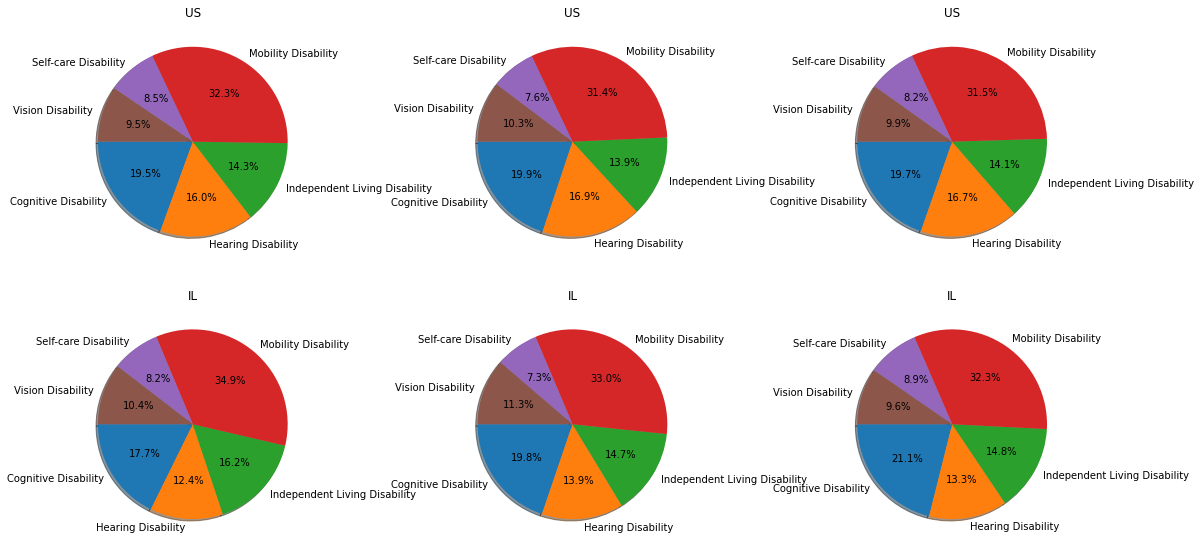

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
matplotlib.rcParams['font.size'] = 10

axes[0][0].set_title('US')
axes[0][0].pie((tmp := df[(df['Year'] == 2017) & (df['LocationAbbr'] == 'US') & (df['Response'].str.contains('Disability')) & ~((df['Response'].str.contains('Any')) | (df['Response'].str.contains('No')))]).sort_values('Response').groupby('Response')['Number'].sum(), labels=tmp['Response'].sort_values().unique(), autopct='%1.1f%%', startangle=180, shadow=True);

axes[0][1].set_title('US')
axes[0][1].pie((tmp := df[(df['Year'] == 2018) & (df['LocationAbbr'] == 'US') & (df['Response'].str.contains('Disability')) & ~((df['Response'].str.contains('Any')) | (df['Response'].str.contains('No')))]).sort_values('Response').groupby('Response')['Number'].sum(), labels=tmp['Response'].sort_values().unique(), autopct='%1.1f%%', startangle=180, shadow=True);

axes[0][2].set_title('US')
axes[0][2].pie((tmp := df[(df['Year'] == 2019) & (df['LocationAbbr'] == 'US') & (df['Response'].str.contains('Disability')) & ~((df['Response'].str.contains('Any')) | (df['Response'].str.contains('No')))]).sort_values('Response').groupby('Response')['Number'].sum(), labels=tmp['Response'].sort_values().unique(), autopct='%1.1f%%', startangle=180, shadow=True);

axes[1][0].set_title('IL')
axes[1][0].pie((tmp := df[(df['Year'] == 2017) & (df['LocationAbbr'] == 'IL') & (df['Response'].str.contains('Disability')) & ~((df['Response'].str.contains('Any')) | (df['Response'].str.contains('No')))]).sort_values('Response').groupby('Response')['Number'].sum(), labels=tmp['Response'].sort_values().unique(), autopct='%1.1f%%', startangle=180, shadow=True);

axes[1][1].set_title('IL')
axes[1][1].pie((tmp := df[(df['Year'] == 2018) & (df['LocationAbbr'] == 'IL') & (df['Response'].str.contains('Disability')) & ~((df['Response'].str.contains('Any')) | (df['Response'].str.contains('No')))]).sort_values('Response').groupby('Response')['Number'].sum(), labels=tmp['Response'].sort_values().unique(), autopct='%1.1f%%', startangle=180, shadow=True);

axes[1][2].set_title('IL')
axes[1][2].pie((tmp := df[(df['Year'] == 2019) & (df['LocationAbbr'] == 'IL') & (df['Response'].str.contains('Disability')) & ~((df['Response'].str.contains('Any')) | (df['Response'].str.contains('No')))]).sort_values('Response').groupby('Response')['Number'].sum(), labels=tmp['Response'].sort_values().unique(), autopct='%1.1f%%', startangle=180, shadow=True);

plt.tight_layout()

## Percentage of Total US by Specific Disability and State

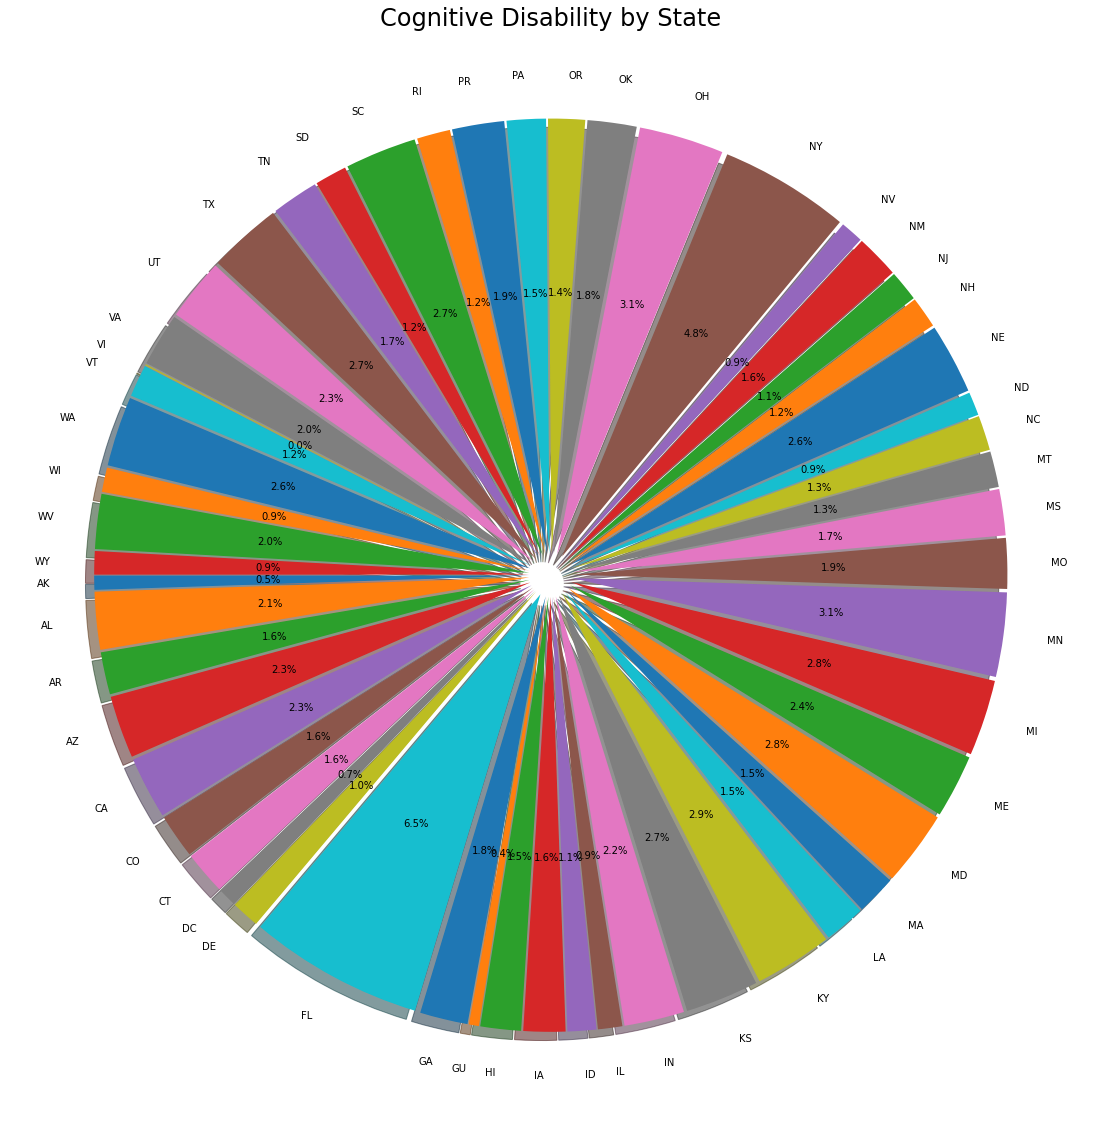

In [7]:
plt.figure(figsize=(30, 20))
matplotlib.rcParams['font.size'] = 20
plt.title('Cognitive Disability by State')
matplotlib.rcParams['font.size'] = 10
plt.pie((tmp := df[(df['Response'] == 'Cognitive Disability') & ~((df['LocationAbbr'] == 'US') | (df['LocationAbbr'].str.contains('HHS')))].sort_values('LocationAbbr')).groupby('LocationAbbr')['Number'].sum(), labels=tmp['LocationAbbr'].unique(), autopct='%1.1f%%', startangle=180, shadow=True, explode=[.05] * 54);

In [8]:
print(f"Florida: {df[(df['LocationAbbr'] == 'FL') & (df['Response'] == 'Cognitive Disability')]['Number'].sum() / df[(df['LocationAbbr'] == 'US') & (df['Response'] == 'Cognitive Disability')]['Number'].sum()*100:3.1f}%")

Florida: 6.5%


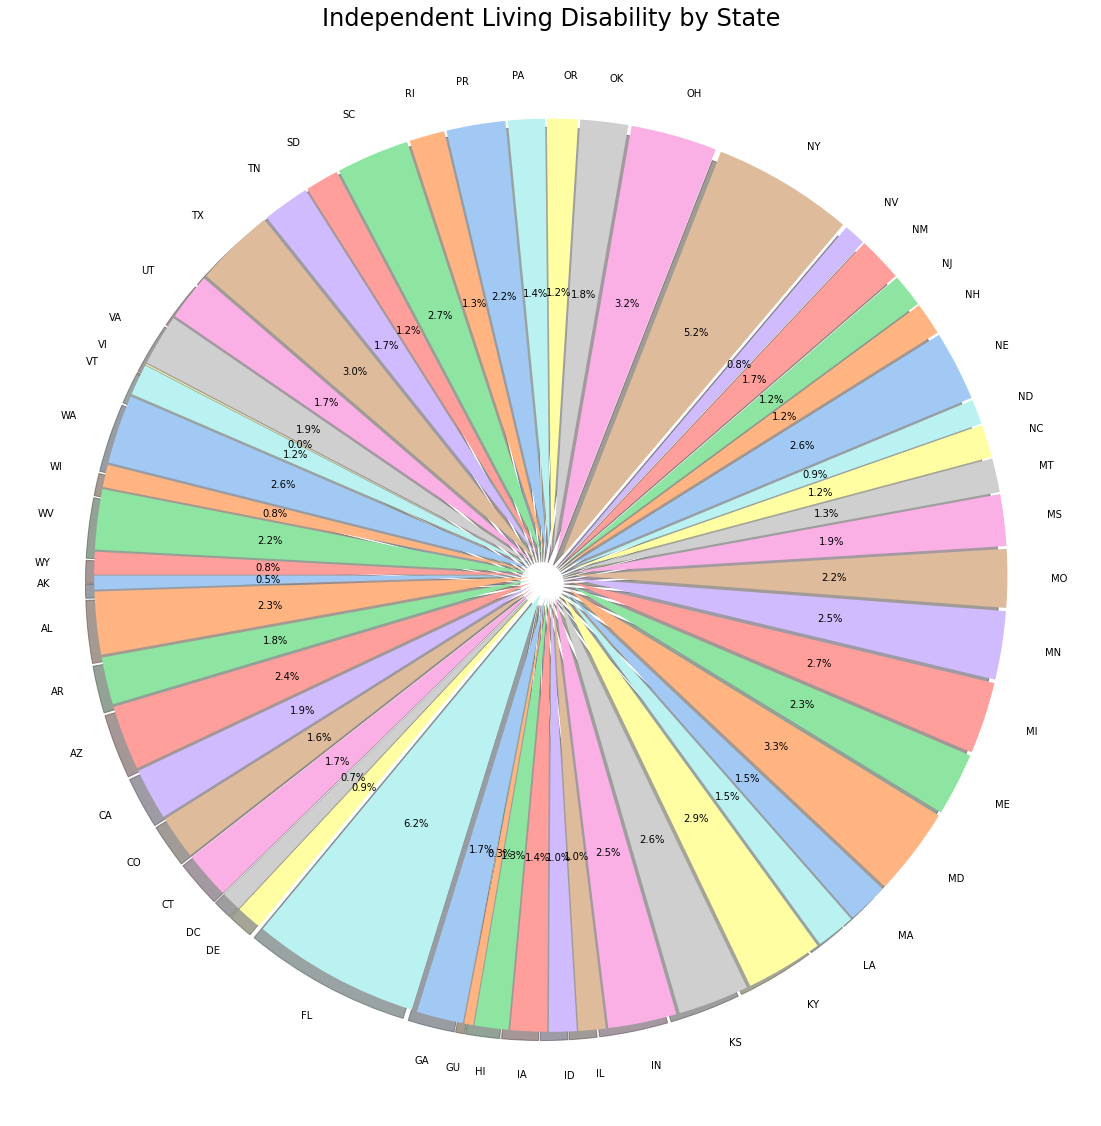

In [9]:
plt.figure(figsize=(30, 20))
matplotlib.rcParams['font.size'] = 20
plt.title('Independent Living Disability by State')
matplotlib.rcParams['font.size'] = 10
colors = sns.color_palette('pastel')[:50]
plt.pie((tmp := df[(df['Response'] == 'Independent Living Disability') & ~((df['LocationAbbr'] == 'US') | (df['LocationAbbr'].str.contains('HHS')))]).sort_values('LocationAbbr').groupby('LocationAbbr')['Number'].sum(), labels=tmp['LocationAbbr'].sort_values().unique(), autopct='%1.1f%%', startangle=180, shadow=True, colors=colors, explode=[.05] * 54);

In [10]:
print(f"Florida: {df[(df['LocationAbbr'] == 'FL') & (df['Response'] == 'Independent Living Disability')]['Number'].sum() / df[(df['LocationAbbr'] == 'US') & (df['Response'] == 'Independent Living Disability')]['Number'].sum()*100:3.1f}%")

Florida: 6.2%


## Heatmap

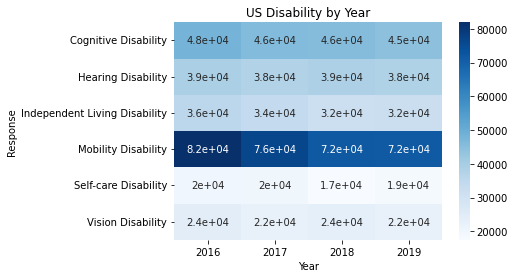

In [11]:
matplotlib.rcParams['font.size'] = 10
plt.title('US Disability by Year')
sns.heatmap(data=df[(df['LocationAbbr'] == 'US') & (df['Response'].str.contains('Disability')) & ~((df['Response'].str.contains('No')) | (df['Response'].str.contains('Any')))].groupby(['Year', 'Response'])['Number'].sum().reset_index().sort_values(['Response', 'Number'], ascending=False).pivot('Response', 'Year', 'Number'), cmap='Blues', annot=True);

## Spotchecks

In [12]:
df[(df['LocationAbbr'] == 'US') & (df['Response'].str.contains('Disability')) & ~((df['Response'].str.contains('No')) | (df['Response'].str.contains('Any')))].groupby(['Year', 'Response'])['Number'].sum().max()

81946.0

In [13]:
df[(df['LocationAbbr'] == 'US') & (df['Response'] == 'Cognitive Disability') & (df['Year'] == 2016)]['Number'].item()

48175.0